# Del 9: Priprava in čiščenje podatkov - napredno

## Working With Strings In Pandas

### Data

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [15]:
world_dev.head(3)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0


In [16]:
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [17]:
merged = pd.merge(left=happiness2015,
                 right=world_dev,
                 how="left",
                  left_on="Country",
                  right_on = "ShortName"
                 )


col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged.rename(col_renaming, axis=1, inplace=True)

In [18]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


### Using Apply to Transform Strings

In [22]:
merged["CurrencyUnit"].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

In [24]:
words = 'Danish krone'
splited_word = words.split(" ")
splited_word[-1]

'krone'

In [25]:
def extract_last_word(element):
    return str(element).split()[-1]

In [27]:
merged["Currency Apply"] = merged["CurrencyUnit"].apply(extract_last_word)

In [28]:
merged["Currency Apply"].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

### Vectorized String Methods

<img src="./images/Split.png">

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

<img src="./images/Syntax.png">

In [29]:
merged["CurrencyUnit"].str

In [39]:
merged["CurrencyUnit"].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

In [31]:
merged["CurrencyUnit"].str[0:5].head()

0    Swiss
1    Icela
2    Danis
3    Norwe
4    Canad
Name: CurrencyUnit, dtype: object

In [32]:
merged["CurrencyUnit"].str.upper().str.split().str.get(-1)

0       FRANC
1       KRONA
2       KRONE
3       KRONE
4      DOLLAR
        ...  
153     FRANC
154     FRANC
155       NaN
156     FRANC
157     FRANC
Name: CurrencyUnit, Length: 158, dtype: object

In [33]:
merged["CurrencyUnit"].str.upper().str.split(" ").head()

0        [SWISS, FRANC]
1      [ICELAND, KRONA]
2       [DANISH, KRONE]
3    [NORWEGIAN, KRONE]
4    [CANADIAN, DOLLAR]
Name: CurrencyUnit, dtype: object

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use the Series.str.split() method to split the CurrencyUnit column into a list of words and then use the Series.str.get() method to select just the last word. Assign the result to merged['Currency Vectorized'].
</div>

In [36]:
merged['Currency Vectorized'] = merged["CurrencyUnit"].str.split(" ").str.get(-1)

In [38]:
merged["Currency Vectorized"].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

#### Exploring Missing Values with Vectorized String Methods

In [40]:
merged["CurrencyUnit"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155     True
156    False
157    False
Name: CurrencyUnit, Length: 158, dtype: bool

In [41]:
merged["CurrencyUnit"].isnull().sum()

13

In [49]:
merged[merged["CurrencyUnit"].isnull()]

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
44,Slovakia,Central and Eastern Europe,45,5.995,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
65,North Cyprus,Western Europe,66,5.695,0.05635,1.20806,1.07008,0.92356,0.49027,0.14280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
76,Kyrgyzstan,Central and Eastern Europe,77,5.286,0.03823,0.47428,1.15115,0.65088,0.43477,0.04232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
98,Laos,Southeastern Asia,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
107,Palestinian Territories,Middle East and Northern Africa,108,4.715,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.03680,0.00000,1.00120,0.09806,0.22605,0.07625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN


In [50]:
def compute_lengths(element):
    return len(str(element))

In [51]:
lengths_apply = merged["CurrencyUnit"].apply(compute_lengths)

In [52]:
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
23     1
10     1
39     1
20     1
Name: CurrencyUnit, dtype: int64

In [53]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))

In [55]:
lengths_apply = merged["CurrencyUnit"].apply(compute_lengths)

In [56]:
lengths_apply

0      11.0
1      13.0
2      12.0
3      15.0
4      15.0
       ... 
153    13.0
154    22.0
155     NaN
156    13.0
157    22.0
Name: CurrencyUnit, Length: 158, dtype: float64

In [57]:
lengths_apply.value_counts(dropna=False).head()

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
Name: CurrencyUnit, dtype: int64

In [59]:
lengths = merged["CurrencyUnit"].str.len()

In [60]:
lengths

0      11.0
1      13.0
2      12.0
3      15.0
4      15.0
       ... 
153    13.0
154    22.0
155     NaN
156    13.0
157    22.0
Name: CurrencyUnit, Length: 158, dtype: float64

In [61]:
lengths.value_counts(dropna=False).head()

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
Name: CurrencyUnit, dtype: int64

## Regular Expressions in Pandas

### The Regular Expression Module

In [62]:
import re

In [64]:
help(re.search)

Help on function search in module re:

search(pattern, string, flags=0)
    Scan through string looking for a match to the pattern, returning
    a Match object, or None if no match was found.



In [73]:
m = re.search("and","hand")

In [74]:
print(m)

<re.Match object; span=(1, 4), match='and'>


In [75]:
m = re.search("and","antidote")

In [76]:
print(m)

None


### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [77]:
# [Aa]nd --> ...And.. ali ...and...
# an[dt] --> ...and.. ali ...ant..

In [78]:
pattern = r"[Nn]ational accounts"

In [ ]:
# Series.str.containes()

In [79]:
help(pd.Series.str.contains)

Help on function contains in module pandas.core.strings.accessor:

contains(self, pat, case=True, flags=0, na=None, regex=True)
    Test if pattern or regex is contained within a string of a Series or Index.
    
    Return boolean Series or Index based on whether a given pattern or regex is
    contained within a string of a Series or Index.
    
    Parameters
    ----------
    pat : str
        Character sequence or regular expression.
    case : bool, default True
        If True, case sensitive.
    flags : int, default 0 (no flags)
        Flags to pass through to the re module, e.g. re.IGNORECASE.
    na : scalar, optional
        Fill value for missing values. The default depends on dtype of the
        array. For object-dtype, ``numpy.nan`` is used. For ``StringDtype``,
        ``pandas.NA`` is used.
    regex : bool, default True
        If True, assumes the pat is a regular expression.
    
        If False, treats the pat as a literal string.
    
    Returns
    -------
 

In [80]:
merged["SpecialNotes"]

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4      Fiscal year end: March 31; reporting period fo...
                             ...                        
153    Based on official government statistics, natio...
154                                                  NaN
155                                                  NaN
156                                                  NaN
157    April 2013 database update: Based on IMF data,...
Name: SpecialNotes, Length: 158, dtype: object

In [81]:
national_accounts = merged["SpecialNotes"].str.contains(pattern)

In [83]:
national_accounts.head(8)

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
7     True
Name: SpecialNotes, dtype: object

In [85]:
pattern_count = national_accounts.sum()

In [86]:
print(pattern_count)

54


In [87]:
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

### Using Regular Expressions to Select Data

In [88]:
try:
    merged[national_accounts]
except ValueError as e:
    print(e)

Cannot mask with non-boolean array containing NA / NaN values


In [89]:
national_accounts = merged["SpecialNotes"].str.contains(pattern,na=False)

In [91]:
merged_national_accounts = merged[national_accounts]

In [96]:
merged_national_accounts.head(3)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar


### Import new dataset

<ul>
<li><code>id</code>: The unique identifier from Hacker News for the story</li>
<li><code>title</code>: The title of the story</li>
<li><code>url</code>: The URL that the stories links to, if the story has a URL</li>
<li><code>num_points</code>: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes</li>
<li><code>num_comments</code>: The number of comments that were made on the story</li>
<li><code>author</code>: The username of the person who submitted the story</li>
<li><code>created_at</code>: The date and time at which the story was submitted</li>
</ul>

In [98]:
hn = pd.read_csv('data/hacker_news.csv')

In [100]:
hn.head(2)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20


In [101]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20099 non-null  int64 
 1   title         20099 non-null  object
 2   url           17659 non-null  object
 3   num_points    20099 non-null  int64 
 4   num_comments  20099 non-null  int64 
 5   author        20099 non-null  object
 6   created_at    20099 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


<div class="alert alert-block alert-info">
<b>Vaja: </b> Use Series.str.contains() and Series.sum() with the provided regex pattern to count how many Hacker News titles contain Python or python. Assign the result to python_mentions.
</div>

In [102]:
pattern = r"[Pp]ython"
titles = hn["title"]

In [103]:
python_mentions = titles.str.contains(pattern).sum()
python_mentions

160

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use Series.str.contains() to create a series of the values from titles that contain Ruby or ruby. Assign the result to ruby_titles.
</div>

In [106]:
ruby_mentions = titles[titles.str.contains(r"[Rr]uby",na=False)]
ruby_mentions.head()

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object

### Quantifiers


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


In [119]:
# r"e-?mail" --> ...e-mail... ali ...email...
email_bool = titles.str.contains(r"e-?mail")

In [120]:
email_bool.sum()

86

In [121]:
email_bool.value_counts()

False    20013
True        86
Name: title, dtype: int64

In [123]:
titles[email_bool].head()

119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object

### Character Classes

In [124]:
"[Ss]tring"

'[Ss]tring'

In [125]:
# title: [pdf]

In [ ]:
regex  =r"[pdf]" # --> ...p... ali ...d... ali ...f...

In [127]:
regex = r"\[pdf\]" # --> ...[pdf]...


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


In [130]:
pattern = r"\[\w+\]"
pattern2 = r"\[[A-Za-z0-9_]+\]" # identical

In [131]:
# "AAAZ9_05dkjsdfije" spada v r"[A-Za-z0-9_]+"

In [132]:
pattern 

'\\[\\w+\\]'

In [133]:
r"[\w+]"

'[\\w+]'

In [134]:
tag_titles = titles[titles.str.contains(pattern)]

In [137]:
tag_titles.head()

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

In [138]:
tag_titles.shape

(444,)

### Raw strings

In [139]:
r"ijsdidjbv"

'ijsdidjbv'

In [140]:
print("hello\b")

hello


In [141]:
print(r"hello\b")

hello\b


In [142]:
print("hello\\b")

hello\b


### Extracting Substrings from a Series

In [143]:
# (<returns whats in here>)

In [149]:
tag_5 = tag_titles.head()
print(tag_5)

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object


In [150]:
pattern = r"(\[\w+\])"
tag_5.str.extract(pattern)

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


In [154]:
pattern = r"\[(\w+)\]"
tag_5.str.extract(pattern)

,0
66,pdf
100,German
159,pdf
162,pdf
195,Beta


In [155]:
tag_5.str.extract(pattern).value_counts()

pdf       3
Beta      1
German    1
dtype: int64

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use this technique to extract all of the tags from the Hacker News titles and build a frequency table of those tags.
</div>

In [156]:
pattern = r"\[(\w+)\]"

In [158]:
titles.str.extract(pattern,expand=False).value_counts().head()

pdf      276
video    111
2015       3
audio      3
2014       2
Name: title, dtype: int64

### Using Flags to Modify Regex Patterns

In [159]:
r"[Pp]ython"
r"[Pp][Yy][Tt][Hh][Oo][Nn]"

'[Pp][Yy][Tt][Hh][Oo][Nn]'

In [160]:
email_tests = pd.Series(["email","Email","eMail","EMAIL"])

In [163]:
email_tests.str.contains(r"[Ee][Mm][Aa][Ii][Ll]")

0    True
1    True
2    True
3    True
dtype: bool

In [169]:
re.IGNORECASE, re.I

(re.IGNORECASE, re.IGNORECASE)

In [171]:
email_tests.str.contains(r"email",flags=re.I)

0    True
1    True
2    True
3    True
dtype: bool

<div class="alert alert-block alert-info">
<b>Vaja: </b> Create a case insensitive regex pattern that matches all case variations of the letters SQL. Use that regex pattern and the ignorecase flag to count the number of mentions of SQL in titles.
</div>

In [172]:
pattern = r"SQL"
titles.str.contains(pattern,flags=re.I).sum()

108

### Primer: Create a frequency table of the different capitalizations of SQL

In [173]:
pattern = r"(SQL)"

In [174]:
sql_capitalization = titles.str.extract(pattern,flags=re.I,expand=False)

In [176]:
sql_capitalization.value_counts()

SQL    101
Sql      4
sql      3
Name: title, dtype: int64

In [178]:
hn_sql = hn[hn["title"].str.contains(r"\w+SQL",flags=re.I)].copy()

In [180]:
hn_sql.head(3)

,id,title,url,num_points,num_comments,author,created_at
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55


In [181]:
hn_sql["flavor"] = hn_sql["title"].str.extract(r"(\w+SQL)",flags=re.I,expand=False)

In [183]:
hn_sql.head()

,id,title,url,num_points,num_comments,author,created_at,flavor
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21,PostgreSQL
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32,MemSQL
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55,PostgreSQL
1160,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04,NoSQL
1197,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29,PostgreSQL


In [185]:
hn_sql["flavor"].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
SparkSQL       1
nosql          1
mySql          1
CloudSQL       1
Name: flavor, dtype: int64

In [186]:
hn_sql["flavor"] = hn_sql["flavor"].str.lower()

In [187]:
hn_sql["flavor"].value_counts()

postgresql    27
nosql         17
mysql         13
memsql         1
sparksql       1
cloudsql       1
Name: flavor, dtype: int64

In [189]:
sql_pivot = hn_sql.pivot_table(index="flavor",values="num_comments", aggfunc="mean")

In [190]:
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


### Primer: Versions of Python

In [192]:
pattern = r"[Pp]ython ([\d\.]+)"

In [193]:
py_versions = titles.str.extract(pattern,expand = False)
py_versions.value_counts()

3        10
2         3
3.5       3
3.6       2
2.7       1
1.5       1
8         1
3.5.0     1
4         1
Name: title, dtype: int64

### Primer: Extracting URL Parts

In [194]:
pattern = "Http://google.com/maps/1/2/3/indx.html"

In [197]:
url_parts = hn["url"]

In [198]:
url_parts.head()

0              http://www.interactivedynamicvideo.com/
1    http://www.thewire.com/entertainment/2013/04/f...
2    https://www.amazon.com/Technology-Ventures-Ent...
3    http://www.nytimes.com/2007/11/07/movies/07ste...
4    http://arstechnica.com/business/2015/10/comcas...
Name: url, dtype: object

In [199]:
pattern = r"(.+)://([\w\.]+)/?(.*)"

In [200]:
test_url_exracted = url_parts.str.extract(pattern)

In [201]:
test_url_exracted.head()

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


#### Using Named Capture Groups

In [202]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"

In [203]:
url_parts = hn["url"].str.extract(pattern)

In [204]:
url_parts

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


### Primer: Clean a String Column, Aggregate the Data, and Plot the Results

In [209]:
pv_incomes = merged.pivot_table(values="Happiness Score", index = "IncomeGroup")

In [210]:
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


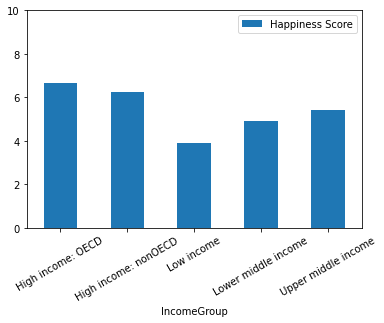

In [211]:
import matplotlib.pyplot as plt
pv_incomes.plot(kind="bar",rot=30,ylim=(0,10))
plt.show()

In [213]:
merged["IncomeGroup"] = merged["IncomeGroup"].str.replace(" income","").str.replace(":","").str.upper()

In [214]:
pv_incomes = merged.pivot_table(values="Happiness Score", index = "IncomeGroup")

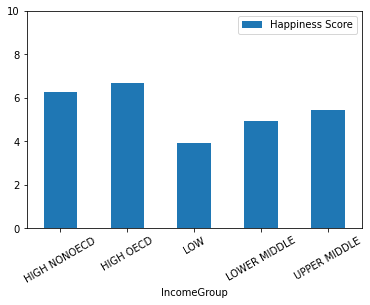

In [215]:
pv_incomes.plot(kind="bar",rot=30,ylim=(0,10))
plt.show()

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

## Working With Missing Data

### Introduction

In [216]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [217]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [218]:
shape_2015

(164, 13)

In [219]:
shape_2016

(164, 14)

In [220]:
shape_2017

(164, 13)

### Identifying Missing Values

In [221]:
missing = happiness2015["Happiness Score"].isnull()

In [225]:
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [226]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [227]:
missing = happiness2016["Happiness Score"].isnull()

In [228]:
happiness2016[missing]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
157,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
158,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
159,Lesotho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
160,Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
161,Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
162,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
163,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


In [229]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [233]:
missing = happiness2017["Happiness.Score"].isnull()

In [234]:
happiness2017[missing]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
155,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
156,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
157,Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
158,Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
159,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
160,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
161,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
162,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
163,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [235]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [236]:
combined = pd.concat([happiness2015,happiness2016,happiness2017],ignore_index=True,sort=True)

In [239]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Dystopia Residual              315 non-null    float64
 2   Dystopia.Residual              155 non-null    float64
 3   Economy (GDP per Capita)       315 non-null    float64
 4   Economy..GDP.per.Capita.       155 non-null    float64
 5   Family                         470 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Generosity                     470 non-null    float64
 8   Happiness Rank                 315 non-null    float64
 9   Happiness Score                315 non-null    float64
 10  Happiness.Rank                 155 non-null    float64
 11  Happiness.Score                155 non-null    float64
 12  Health (Life Expectancy)       315 non-null    flo

In [242]:
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

In [243]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [244]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [271]:
happiness2017.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY  GDP PER CAPITA', 'FAMILY',
       'HEALTH  LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST  GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [272]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [273]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [283]:
happiness2017.columns = happiness2017.columns.str.replace("."," ",regex=True) \
                                            .str.replace(r"  "," ",regex=True) \
                                            .str.replace(r"[\(\)]","",regex=True) \
                                            .str.strip() \
                                            .str.upper()

In [284]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [285]:
happiness2016.columns = happiness2016.columns.str.replace('.', ' ', regex=True) \
                    .str.replace(r"  "," ",regex=True) \
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.strip() \
                    .str.upper()

In [286]:
happiness2016.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [287]:
happiness2015.columns = happiness2015.columns.str.replace('.', ' ', regex=True) \
                    .str.replace(r"  "," ",regex=True) \
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.strip() \
                    .str.upper()

In [288]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [289]:
combined = pd.concat([happiness2015,happiness2016,happiness2017],ignore_index  =True,sort = True)

In [290]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015


In [291]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

### Visualizing Missing Data

In [296]:
# !pip install seaborn

In [297]:
import seaborn as sns

In [298]:
combined_updated = combined.set_index("YEAR")

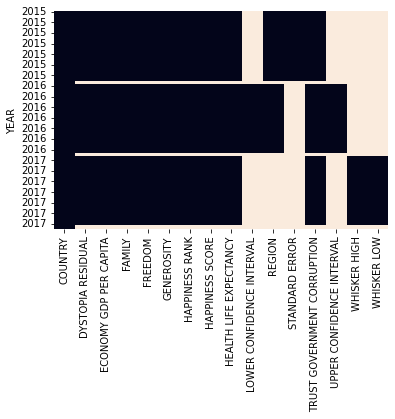

In [299]:
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [300]:
regions_2017 = combined[combined["YEAR"] == 2017]["REGION"]

In [303]:
missing = regions_2017.isnull().sum()

In [304]:
print(missing)

164


### Using Data From Additional Sources to Fill in Missing Values

In [308]:
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()
regions = pd.concat([regions2015,regions2016],ignore_index = True)
regions.dropna(inplace=True)
regions.drop_duplicates(inplace=True)

In [309]:
regions

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
215,Belize,Latin America and Caribbean
239,Somalia,Sub-Saharan Africa
260,Somaliland Region,Sub-Saharan Africa
276,Namibia,Sub-Saharan Africa


In [310]:
combined = pd.merge(left=combined, right=regions, on="COUNTRY", how="left")

In [311]:
combined.shape

(492, 18)

In [316]:
combined = combined.drop("REGION_x",axis=1)

In [317]:
missing = combined.isnull().sum()

In [318]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                         0
dtype: int64

### Identifying Duplicates Values

In [319]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION_y'],
      dtype='object')

In [321]:
combined.rename(columns={"REGION_y":"REGION"},inplace=True)

In [322]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION'],
      dtype='object')

In [323]:
dups = combined.duplicated(["COUNTRY","YEAR"])

In [324]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION


In [325]:
combined["COUNTRY"] = combined["COUNTRY"].str.upper()

In [326]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America


In [327]:
dups = combined.duplicated(["COUNTRY","YEAR"])

In [328]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Correcting Duplicates Values

In [329]:
combined[combined["COUNTRY"] == "SOMALILAND REGION"]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [330]:
combined = combined.drop_duplicates(["COUNTRY","YEAR"])

In [331]:
combined[combined["COUNTRY"] == "SOMALILAND REGION"]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Handle Missing Values by Dropping Columns

In [334]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America


In [336]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 491
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTRY                      489 non-null    object 
 1   DYSTOPIA RESIDUAL            470 non-null    float64
 2   ECONOMY GDP PER CAPITA       470 non-null    float64
 3   FAMILY                       470 non-null    float64
 4   FREEDOM                      470 non-null    float64
 5   GENEROSITY                   470 non-null    float64
 6   HAPPINESS RANK               470 non-null    float64
 7   HAPPINESS SCORE              470 non-null    float64
 8   HEALTH LIFE EXPECTANCY       470 non-null    float64
 9   LOWER CONFIDENCE INTERVAL    157 non-null    float64
 10  STANDARD ERROR               158 non-null    float64
 11  TRUST GOVERNMENT CORRUPTION  470 non-null    float64
 12  UPPER CONFIDENCE INTERVAL    157 non-null    float64
 13  WHISKER HIGH        

In [338]:
combined.isnull().sum()/489*100

COUNTRY                         0.000000
DYSTOPIA RESIDUAL               3.885481
ECONOMY GDP PER CAPITA          3.885481
FAMILY                          3.885481
FREEDOM                         3.885481
GENEROSITY                      3.885481
HAPPINESS RANK                  3.885481
HAPPINESS SCORE                 3.885481
HEALTH LIFE EXPECTANCY          3.885481
LOWER CONFIDENCE INTERVAL      67.893661
STANDARD ERROR                 67.689162
TRUST GOVERNMENT CORRUPTION     3.885481
UPPER CONFIDENCE INTERVAL      67.893661
WHISKER HIGH                   68.302658
WHISKER LOW                    68.302658
YEAR                            0.000000
REGION                          0.000000
dtype: float64

In [339]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
FREEDOM                         19
GENEROSITY                      19
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
HEALTH LIFE EXPECTANCY          19
LOWER CONFIDENCE INTERVAL      332
STANDARD ERROR                 331
TRUST GOVERNMENT CORRUPTION     19
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
YEAR                             0
REGION                           0
dtype: int64

In [340]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

In [341]:
combined_droped = combined.drop(columns_to_drop,axis=1)

In [342]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

In [ ]:
# df.dropna(axis=1, thresh=?)

In [344]:
combined.notnull().sum().sort_valueslues()

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
HEALTH LIFE EXPECTANCY         470
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
TRUST GOVERNMENT CORRUPTION    470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64

In [346]:
combined_droped = combined.dropna(axis=1,thresh=159)

### Analyzing Missing Data

In [350]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

In [351]:
sorted_values = combined_droped.set_index("REGION").sort_values(["REGION","HAPPINESS SCORE"])

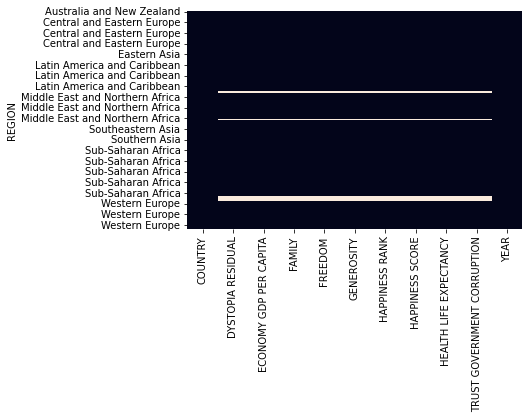

In [354]:
sns.heatmap(sorted_values.isnull(),cbar=False)
plt.show()

### Handling Missing Values with Imputation

In [355]:
happiness_mean = combined_droped["HAPPINESS SCORE"].mean()

In [356]:
happiness_mean

5.370727659882891

In [358]:
combined_droped["HAPPINESS SCORE UPDATED"] = combined_droped["HAPPINESS SCORE"].fillna(happiness_mean)

C:\Users\FAKULT~1\AppData\Local\Temp/ipykernel_10452/2241850267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_droped["HAPPINESS SCORE UPDATED"] = combined_droped["HAPPINESS SCORE"].fillna(happiness_mean)


In [359]:
combined_droped["HAPPINESS SCORE UPDATED"].mean()

5.370727659882891

### Dropping Rows

In [361]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
HAPPINESS SCORE UPDATED         0
dtype: int64

In [362]:
combined_droped.pivot_table(index="REGION",values="HAPPINESS SCORE", margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [363]:
combined_droped.pivot_table(index="REGION",values="HAPPINESS SCORE UPDATED", margins=True)

,HAPPINESS SCORE UPDATED
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.030277
Middle East and Northern Africa,5.387308
North America,7.227167
Southeastern Asia,5.364323
Southern Asia,4.590857
Sub-Saharan Africa,4.264424


In [365]:
combined_droped = combined_droped.dropna()

In [367]:
combined_droped.isnull().sum()

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [369]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

In [371]:
happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [372]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.5870000000000015,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678000000000004,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.6287699999999999,0.14145,0.4363,2.70201,2015


In [375]:
np.sort(happiness2015["Region"].unique())

array(['.', 'Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

In [376]:
happiness2015[happiness2015["Region"]=="."]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,.,?,.,.,.,.,.,.,.,.,.,2015
159,Namibia,.,?,.,.,.,.,.,.,.,.,.,2015
160,Puerto Rico,.,?,.,.,.,.,.,.,.,.,.,2015
161,Somalia,.,?,.,.,.,.,.,.,.,.,.,2015
162,Somaliland Region,.,?,.,.,.,.,.,.,.,.,.,2015
163,South Sudan,.,?,.,.,.,.,.,.,.,.,.,2015


In [377]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv',na_values=".")

In [378]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   0
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [379]:
happiness2015[happiness2015["Region"].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


### Primer: Diabetes

In [381]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

In [382]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [383]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [384]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [385]:
zero_bmi = diabetes.loc[diabetes["BMI"]==0, "BMI"]

In [387]:
zero_bmi

9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64

In [388]:
diabetes.loc[diabetes["BMI"]==0, "BMI"] = np.nan

In [389]:
diabetes.loc[diabetes["BMI"].isnull(), "BMI"]

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

#### Analyzing missingness percentage

In [390]:
diabetes_nullity = diabetes.isnull()
missing_values_sum = diabetes_nullity.sum()
print("Total missing values:\n",missing_values_sum)

Total missing values:
 Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [391]:
missing_values_sum_perc = missing_values_sum/diabetes.shape[0]*100
print("Percentage of missing values:\n",missing_values_sum_perc)

Percentage of missing values:
 Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


## Andvance Visualization of Missing Data

In [393]:
# !pip install missingno

In [394]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

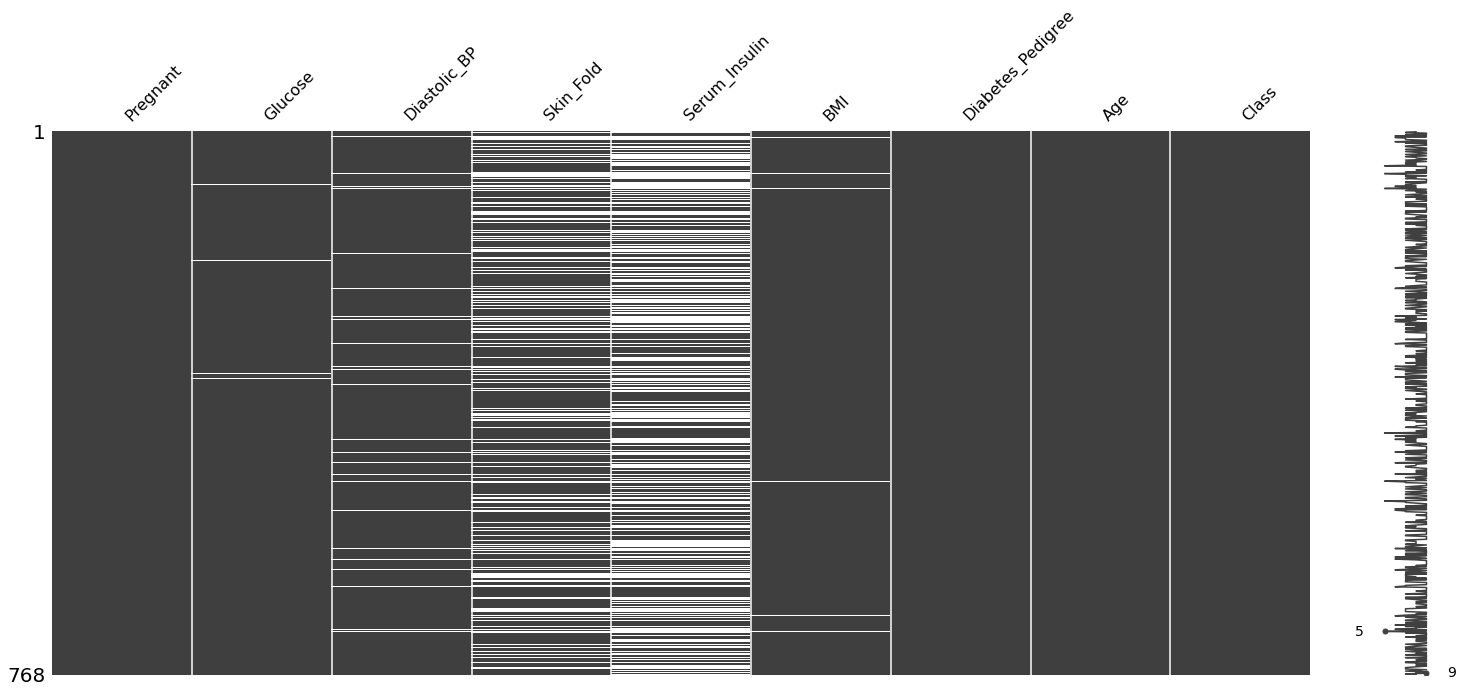

In [395]:
msno.matrix(diabetes)
plt.show()

### Missingness Patterns

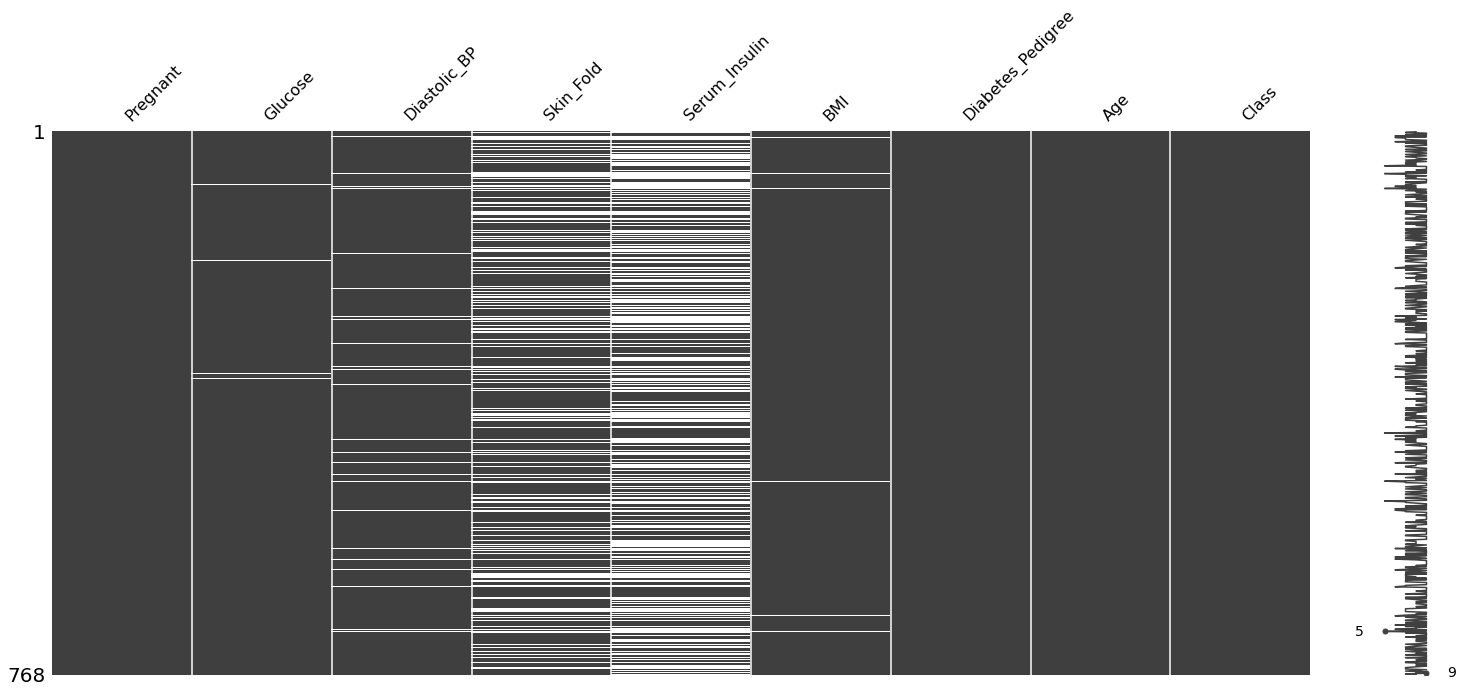

In [395]:
msno.matrix(diabetes)
plt.show()

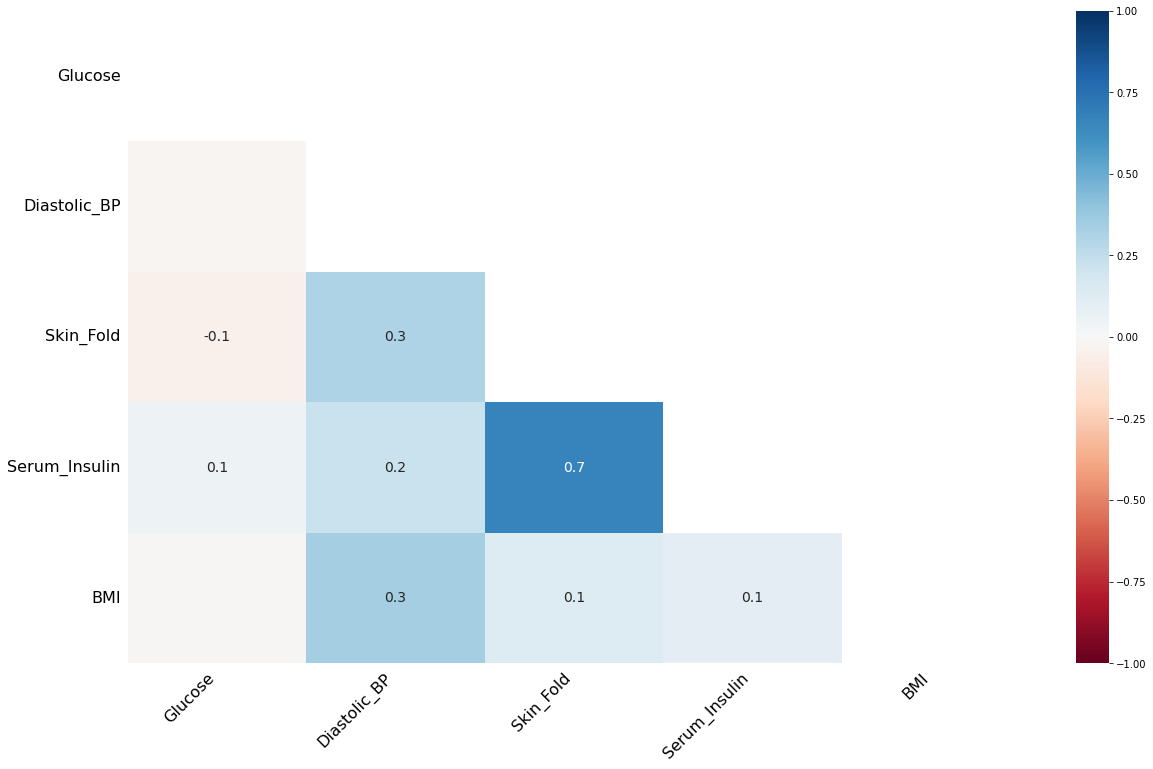

In [396]:
msno.heatmap(diabetes)
plt.show()

## Handle Missing Values

### Dropping Rows

In [397]:
print(diabetes["Glucose"].isnull().sum())

5


In [398]:
diabetes.dropna(subset=["Glucose"],how="all",inplace=True)

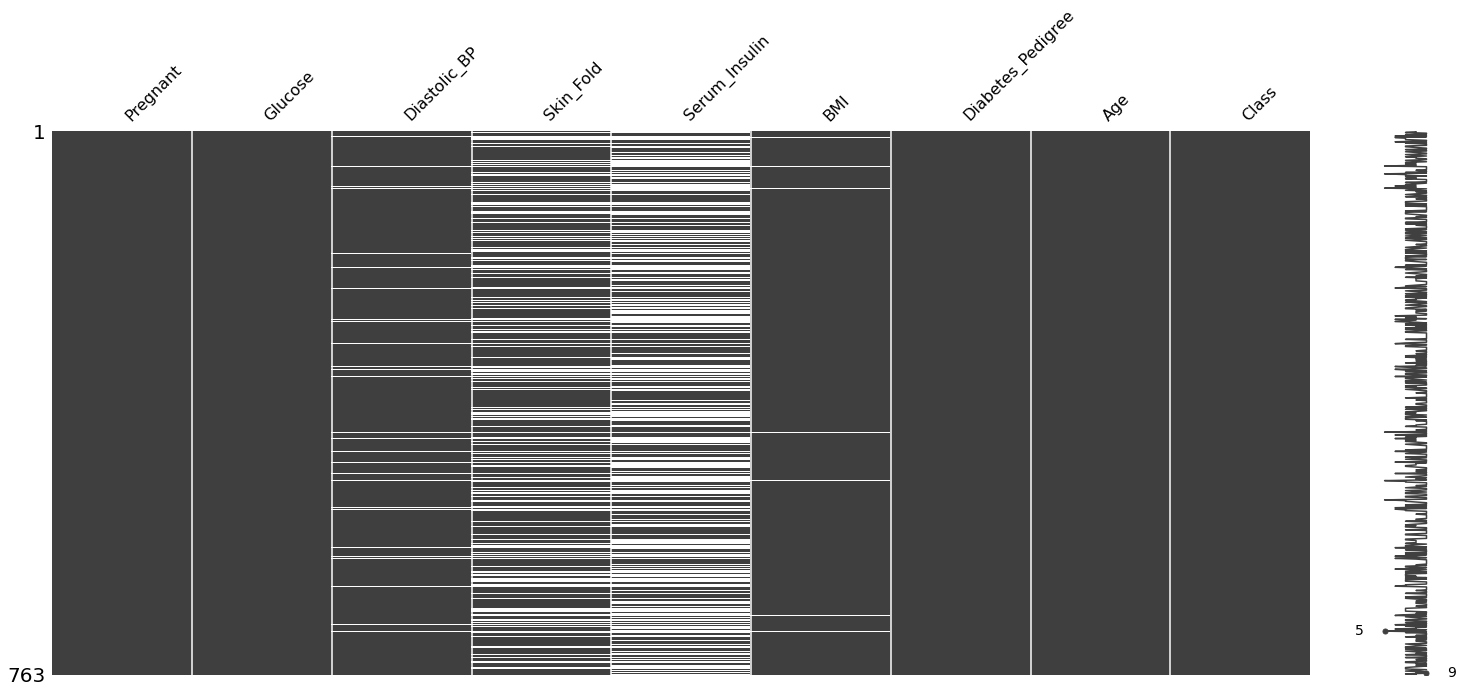

In [399]:
msno.matrix(diabetes)
plt.show()

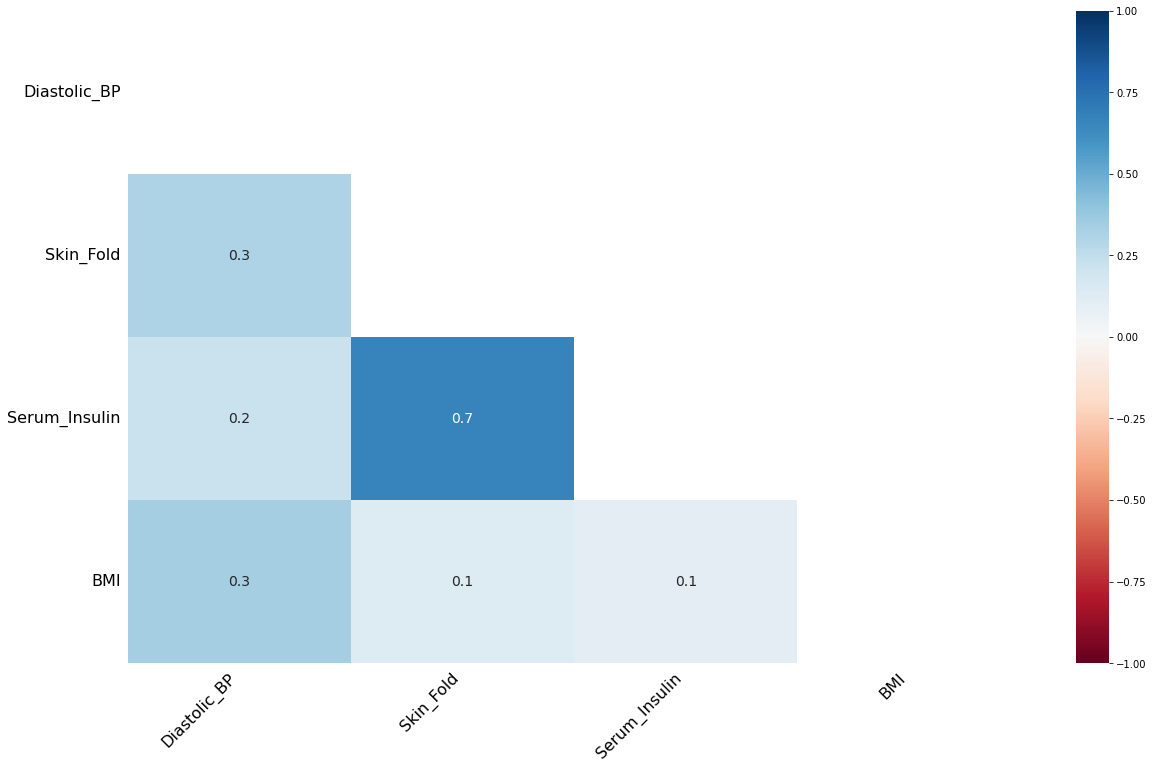

In [402]:
msno.heatmap(diabetes)
plt.show()

In [403]:
diabetes.dropna(subset=["BMI"],how="all",inplace=True)

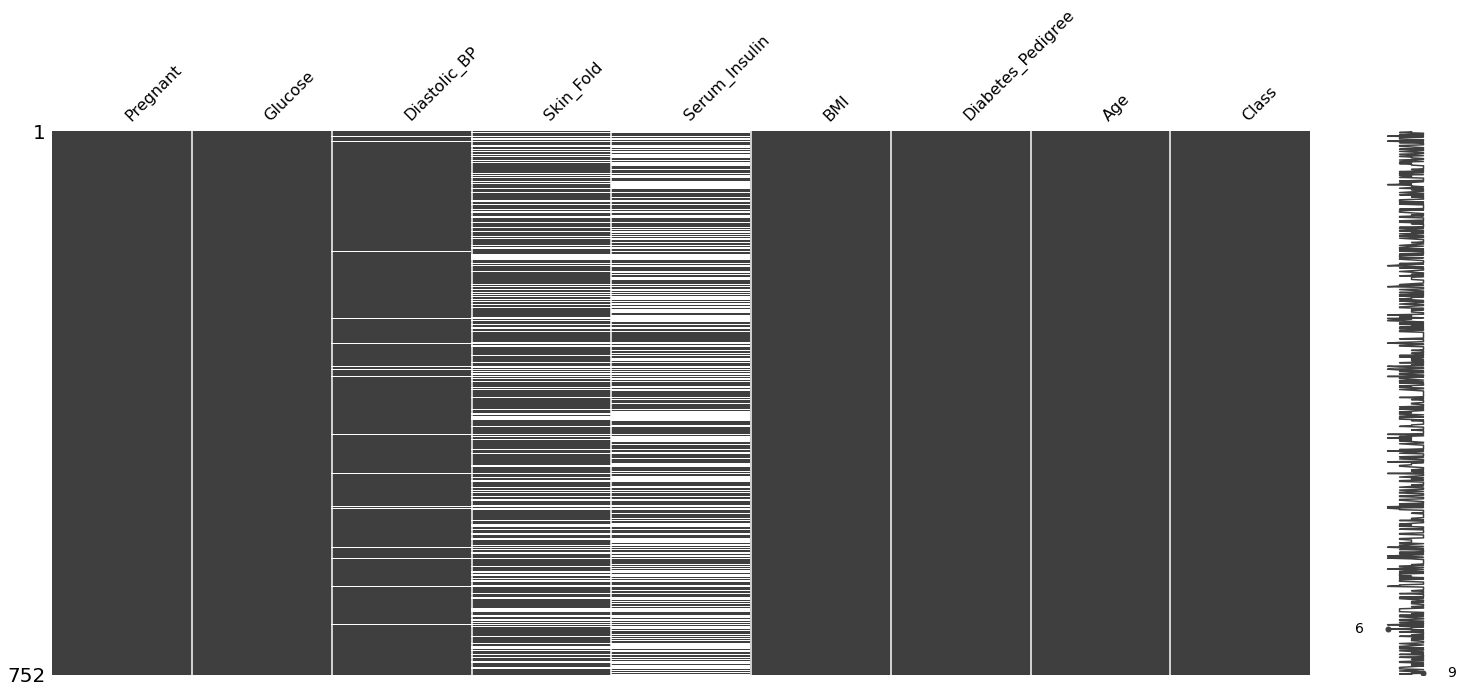

In [404]:
msno.matrix(diabetes)
plt.show()

In [405]:
diabetes.isnull().sum()

Pregnant               0
Glucose                0
Diastolic_BP          28
Skin_Fold            218
Serum_Insulin        360
BMI                    0
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

### Imputation Techniques

#### Mean & median imputation


In [407]:
# !pip install sklearn

In [406]:
from sklearn.impute import SimpleImputer

In [409]:
diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
diabetes_mean.iloc[:,:] = mean_imputer.fit_transform(diabetes_mean)

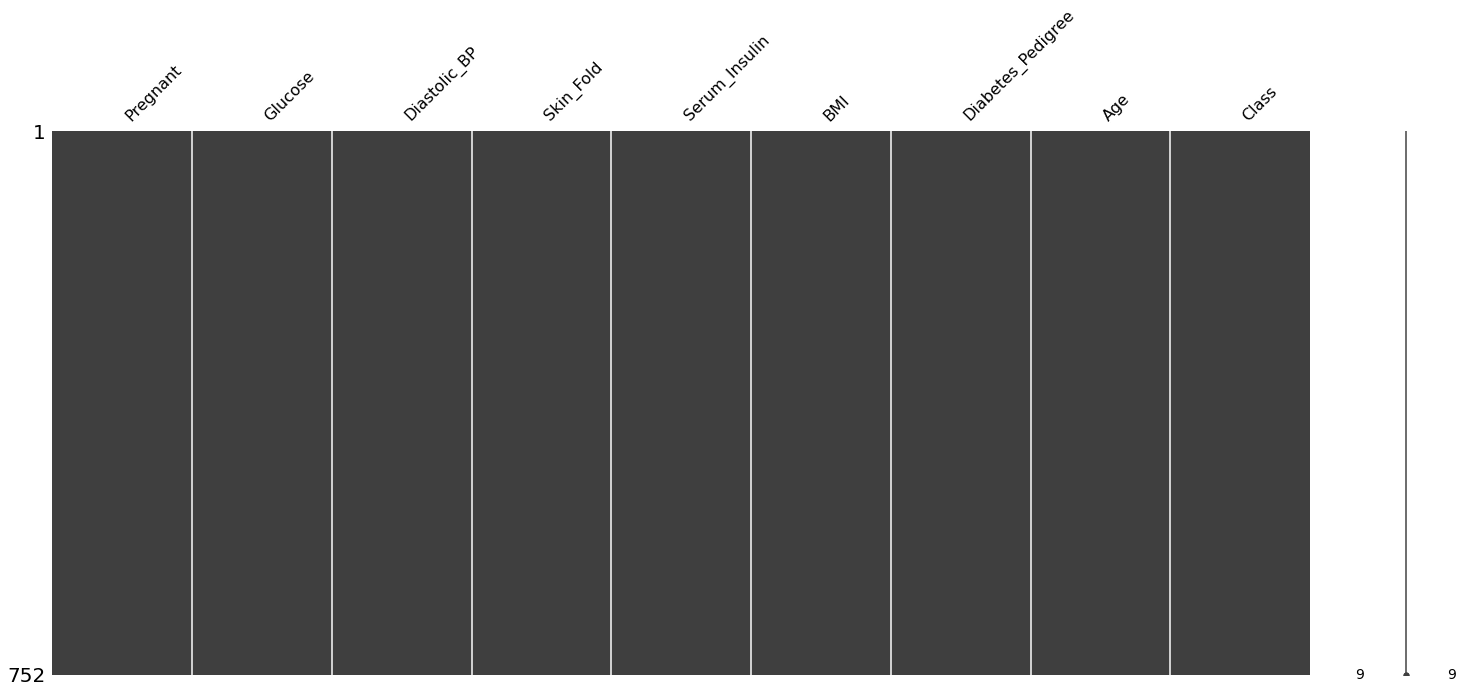

In [410]:
msno.matrix(diabetes_mean)
plt.show()

In [411]:
diabetes_median = diabetes.copy(deep=True)
median_imputer = SimpleImputer(strategy="median")
diabetes_median.iloc[:,:] = median_imputer.fit_transform(diabetes_median)

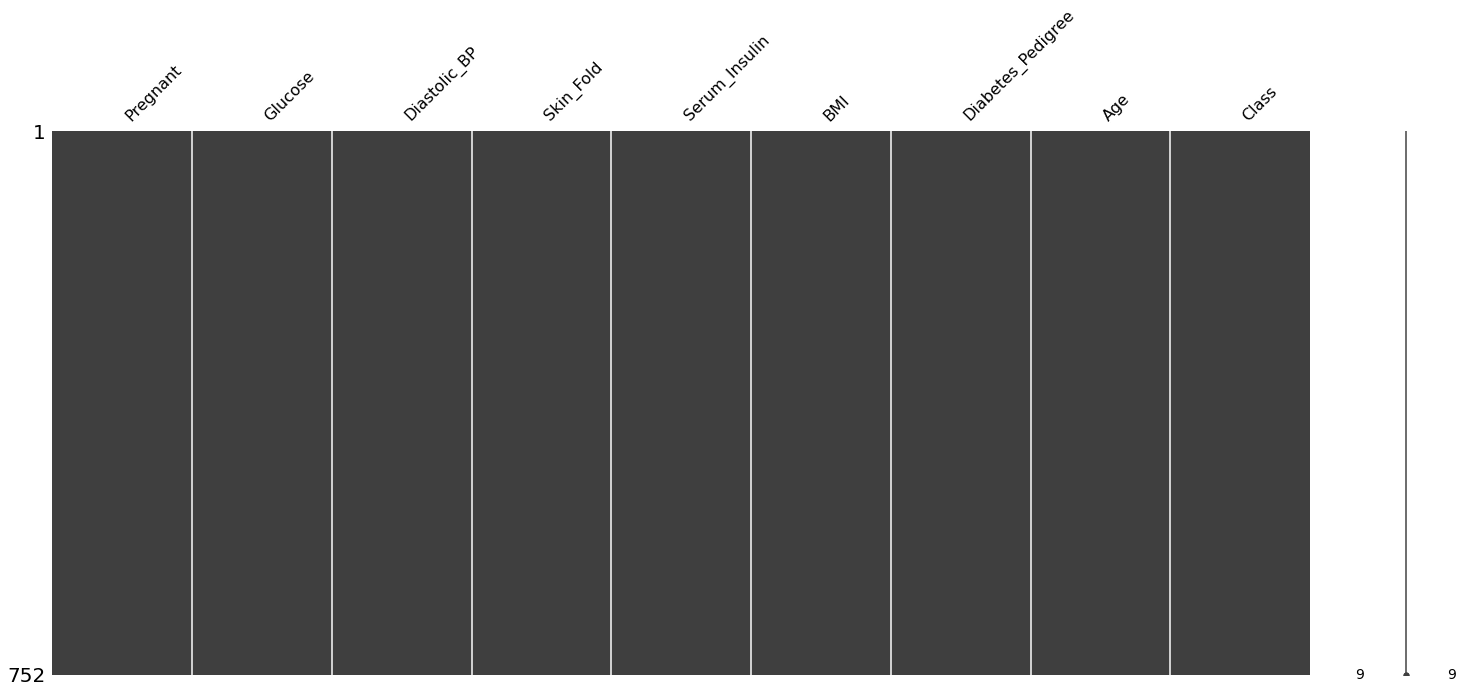

In [412]:
msno.matrix(diabetes_mean)
plt.show()

#### Mode and constant imputation

In [413]:
diabetes_mode = diabetes.copy(deep=True)
mode_imputer = SimpleImputer(strategy="most_frequent")
diabetes_mode.iloc[:,:] = mode_imputer.fit_transform(diabetes_mode)

In [414]:
diabetes_constant = diabetes.copy(deep=True)
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)
diabetes_constant.iloc[:,:] = constant_imputer.fit_transform(diabetes_constant)

#### Visualize imputations

In [416]:
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

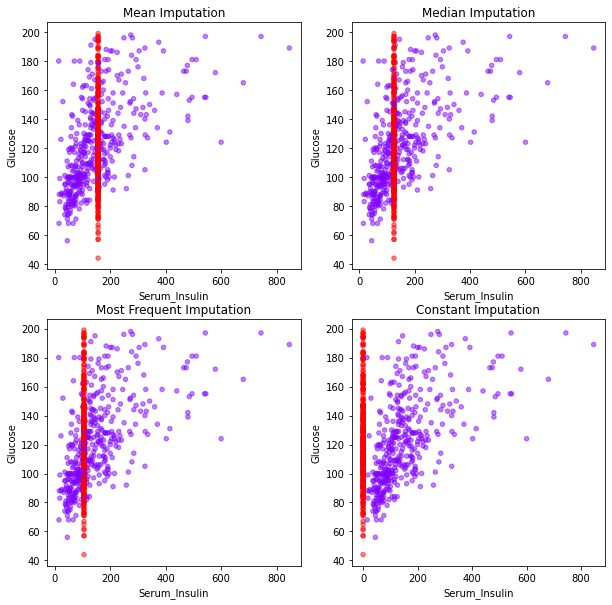

In [421]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
nullity = diabetes["Serum_Insulin"].isnull() | diabetes["Glucose"].isnull()

for ax,df_key in zip(axes.flatten(),imputations):
    imputations[df_key].plot(x="Serum_Insulin",y="Glucose", kind="scatter", ax=ax,title=df_key, cmap="rainbow", c=nullity, colorbar=False, alpha=0.5)